## 나이와 요금의 상관관계가 존재하는가? 

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

print("=" * 70)
print("🔍 [실습 1] 타이타닉: 나이 × 요금 상관관계")
print("=" * 70)

# 결측치 제거
data = df[['Age', 'Fare']].dropna()

print(f"\n📊 데이터 개수: {len(data)}명")
print(f"나이 범위: {data['Age'].min():.0f}세 ~ {data['Age'].max():.0f}세")
print(f"요금 범위: ${data['Fare'].min():.2f} ~ ${data['Fare'].max():.2f}")

🔍 [실습 1] 타이타닉: 나이 × 요금 상관관계

📊 데이터 개수: 714명
나이 범위: 0세 ~ 80세
요금 범위: $0.00 ~ $512.33


In [2]:
data

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [3]:
from scipy.stats import pearsonr

stat, p_val = pearsonr(data['Age'],data['Fare'])

print(f'나이과 요금의 상관관계는 {stat}이고 그 거에 대한 검정력은 {p_val}이다')
# 나이과 요금의 상관관계는 0.09606669176903887이고 그 거에 대한 검정력은 0.010216277504447016이다 -> 즉 거의 상관없다는 뜻

나이과 요금의 상관관계는 0.09606669176903887이고 그 거에 대한 검정력은 0.010216277504447016이다


In [4]:
print("\n" + "=" * 70)
print("🔍 [실습 2] 공부시간 × 성적 (인위적 데이터)")
print("=" * 70)

# 강한 양의 상관관계 데이터 생성
np.random.seed(42)
study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# 성적 = 공부시간 × 8 + 약간의 노이즈
scores = study_hours * 8 + np.random.normal(0, 3, 10)

print(f"\n📚 공부시간: {study_hours}")
print(f"📝 성적:     {scores.round(1)}")



🔍 [실습 2] 공부시간 × 성적 (인위적 데이터)

📚 공부시간: [ 1  2  3  4  5  6  7  8  9 10]
📝 성적:     [ 9.5 15.6 25.9 36.6 39.3 47.3 60.7 66.3 70.6 81.6]


In [5]:
from scipy.stats import pearsonr

stat, p = pearsonr(study_hours,scores)
print(f' 두개의 의 상관관계는 {stat}이고 그 거에 대한 검정력은 {p_val}이다')
# 두개의 의 상관관계는 0.9959970364343443이고 그 거에 대한 검정력은 0.010216277504447016이다 -> 강한상관관계

 두개의 의 상관관계는 0.9959970364343443이고 그 거에 대한 검정력은 0.010216277504447016이다


## 회귀

### 실습

In [7]:
from scipy.stats import linregress

print("\n" + "=" * 70)
print("🔍 [실습 4] 타이타닉 실전: 나이 → 요금 예측")
print("=" * 70)

# 데이터 준비
df_clean = df[['Age', 'Fare']].dropna()
X = df_clean['Age'].values # 🐚 value로 넣는 이유가 ..? 요즘은 밸류로 안해도 그냥 넣어도 됌. 
y = df_clean['Fare'].values

df_regression = linregress(X,y)

print(f"\n📊 데이터 개수: {len(X)}명")
print(f"나이 범위: {X.min():.0f}~{X.max():.0f}세")
print(f"요금 범위: ${y.min():.2f}~${y.max():.2f}")

print(f'기울기: {df_regression.slope} 절편: {df_regression.intercept} 상관계수 : {df_regression.rvalue} 결졍계수: {(df_regression.rvalue)**2} p-value :{df_regression.pvalue} std오차 : {df_regression.stderr}')
# -> 나이와 요금은 상관이 없다는걸 알수있음. 


🔍 [실습 4] 타이타닉 실전: 나이 → 요금 예측

📊 데이터 개수: 714명
나이 범위: 0~80세
요금 범위: $0.00~$512.33
기울기: 0.3499636817440232 절편: 24.30090144928865 상관계수 : 0.09606669176903893 결졍계수: 0.00922880926744753 p-value :0.010216277504447013 std오차 : 0.13589291969825207


## 실습

 1. Pclass와  Fare의 상관관계, 회귀분석
 2. SibSp (형제자매 수) × Fare
 3. Age × Parch (부모자식 수)  

 상관계수, p-value                        │
│  • 회귀식, R²                               │
│  • 산점도 + 회귀선                          │
│  • 해석 (관계가 강한가? 예측 가능한가?)

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


좌석과 요금
기울기: nan 절편: nan 상관계수 : nan 결졍계수: nan p-value :nan std오차 : nan
회귀식:y=nan 결정계수 nan


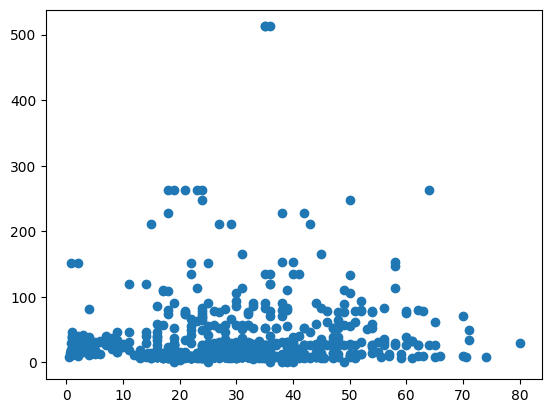

In [9]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

df_regression = linregress(df['Fare'],df['Age'])
print('좌석과 요금')
print(f'기울기: {df_regression.slope} 절편: {df_regression.intercept} 상관계수 : {df_regression.rvalue} 결졍계수: {(df_regression.rvalue)**2} p-value :{df_regression.pvalue} std오차 : {df_regression.stderr}')
# 기울기: -32.660518373948285 절편: 107.6056516220108 상관계수 : -0.5494996199439082 결졍계수: 0.30194983231849953 p-value :1.967386173421901e-71 std오차 : 1.6655133356270908
# 🐚 좌석은 높아질수록 낮은가격임 -> 음의 상관관계 존재한다. 근데 결정계수가 낮은거를 봐서는 이 둘로만은 설명력이 낮은거임. 그에다른 p-value는 낮으니 믿을만하고.

print(f'회귀식:y={(df_regression.slope*X+df_regression.intercept)[0]} 결정계수 {(df_regression.rvalue)**2}')

plt.scatter(X,y)
plt.plot(X,df_regression.slope*X+df_regression.intercept)


<Axes: xlabel='Age', ylabel='Fare'>

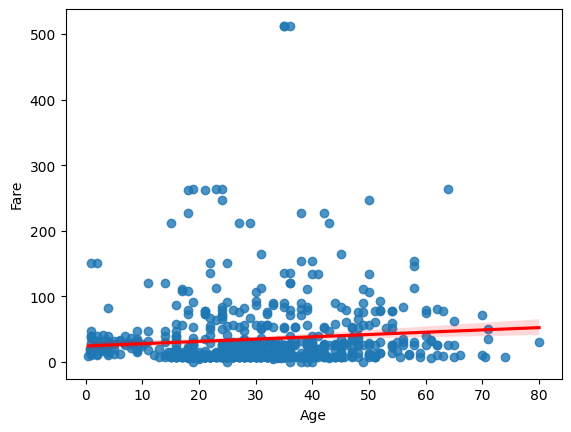

In [ ]:
import seaborn as sns

# 이 한 줄이 위 코드를 다 해준다 (산점도 + 회귀선 + 신뢰구간까지)
sns.regplot(x='Age', y='Fare', data=df, line_kws={'color': 'red'})